# Odds dataframe

# Remember to change the date of the dataframe!

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import odds

In [2]:
odds_response = requests.get(f'https://api.the-odds-api.com/v4/sports/baseball_mlb/odds', params={
    'api_key': odds.api_key,
    'regions': 'us',
    'markets': 'h2h,spreads',
    'oddsFormat': 'american',
    'dateFormat': 'iso',
})

if odds_response.status_code != 200:
    print(f'Failed to get odds: status_code {odds_response.status_code}, response body {odds_response.text}')

else:
    odds_json = odds_response.json()
    print('Number of events:', len(odds_json))

    # Check the usage quota
    print('Remaining requests', odds_response.headers['x-requests-remaining'])
    print('Used requests', odds_response.headers['x-requests-used'])

Number of events: 15
Remaining requests 489
Used requests 11


In [3]:
def json_to_df(json):
    # This function takes in nested json and outputs a dataframe with the wanted columns
    return pd.json_normalize(json, record_path = ['bookmakers', 'markets', 'outcomes'], meta = ['home_team', 'away_team', ['bookmakers', 'title']])

In [4]:
df = json_to_df(odds_json)

In [5]:
df.head(20)

,name,price,point,home_team,away_team,bookmakers.title
0,Cincinnati Reds,163,NaN,Cincinnati Reds,Philadelphia Phillies,BetOnline.ag
1,Philadelphia Phillies,-179,NaN,Cincinnati Reds,Philadelphia Phillies,BetOnline.ag
2,Cincinnati Reds,-104,1.5,Cincinnati Reds,Philadelphia Phillies,BetOnline.ag
3,Philadelphia Phillies,-116,-1.5,Cincinnati Reds,Philadelphia Phillies,BetOnline.ag
4,Cincinnati Reds,155,NaN,Cincinnati Reds,Philadelphia Phillies,DraftKings
5,Philadelphia Phillies,-180,NaN,Cincinnati Reds,Philadelphia Phillies,DraftKings
6,Cincinnati Reds,-105,1.5,Cincinnati Reds,Philadelphia Phillies,DraftKings
7,Philadelphia Phillies,-115,-1.5,Cincinnati Reds,Philadelphia Phillies,DraftKings
8,Cincinnati Reds,163,NaN,Cincinnati Reds,Philadelphia Phillies,LowVig.ag
9,Philadelphia Phillies,-177,NaN,Cincinnati Reds,Philadelphia Phillies,LowVig.ag


In [6]:
df = df[df['point'].isnull()]

In [7]:
df.head()

,name,price,point,home_team,away_team,bookmakers.title
0,Cincinnati Reds,163,NaN,Cincinnati Reds,Philadelphia Phillies,BetOnline.ag
1,Philadelphia Phillies,-179,NaN,Cincinnati Reds,Philadelphia Phillies,BetOnline.ag
4,Cincinnati Reds,155,NaN,Cincinnati Reds,Philadelphia Phillies,DraftKings
5,Philadelphia Phillies,-180,NaN,Cincinnati Reds,Philadelphia Phillies,DraftKings
8,Cincinnati Reds,163,NaN,Cincinnati Reds,Philadelphia Phillies,LowVig.ag


In [8]:
df.to_csv('../data/odds_aug_15th.csv', index = False)

In [9]:
max_line = df.loc[df.groupby('name')['price'].idxmax()]

In [10]:
max_line.drop(columns = 'point', inplace = True)
max_line['name'] = max_line['name'].map({'Arizona Diamondbacks':'ARI', 'Atlanta Braves':'ATL', 'Baltimore Orioles':'BAL', 'Boston Red Sox':'BOS', 'Chicago Cubs':'CHC', 'Chicago White Sox':'CHW', 'Cincinnati Reds':'CIN', 'Cleveland Guardians':'CLE', 'Colorado Rockies':'COL', 'Detroit Tigers':'DET', 'Miami Marlins':'MIA', 'Houston Astros':'HOU', 'Kansas City Royals':'KCR', 'Los Angeles Angels':'LAA', 'Los Angeles Dodgers':'LAD', 'Milwaukee Brewers':'MIL', 'Minnesota Twins':'MIN', 'New York Mets':'NYM', 'New York Yankees':'NYY', 'Oakland Athletics':'OAK', 'Philadelphia Phillies':'PHI', 'Pittsburgh Pirates':'PIT', 'San Diego Padres':'SDP', 'San Francisco Giants':'SFG', 'Seattle Mariners':'SEA', 'St. Louis Cardinals':'STL', 'Tampa Bay Rays':'TBR', 'Texas Rangers':'TEX', 'Toronto Blue Jays':'TOR', 'Washington Nationals':'WSN'})

In [11]:
max_line

,name,price,home_team,away_team,bookmakers.title
1146,ARI,120,San Francisco Giants,Arizona Diamondbacks,Betfair
614,ATL,-135,Atlanta Braves,New York Mets,Betfair
462,BAL,198,Toronto Blue Jays,Baltimore Orioles,Betfair
230,BOS,-127,Pittsburgh Pirates,Boston Red Sox,Betfair
306,CHC,-152,Washington Nationals,Chicago Cubs,Betfair
922,CHW,122,Chicago White Sox,Houston Astros,Betfair
74,CIN,172,Cincinnati Reds,Philadelphia Phillies,Betfair
536,CLE,-192,Cleveland Guardians,Detroit Tigers,Betfair
766,COL,215,St. Louis Cardinals,Colorado Rockies,Betfair
537,DET,198,Cleveland Guardians,Detroit Tigers,Betfair


In [12]:
preds = pd.read_csv('../data/preds_aug_16th.csv')
preds.head()

,team,runs_scored,wp,ml
0,CIN,4.157534,0.248379,302.609781
1,PHI,7.232314,0.751621,-302.609781
2,MIA,3.936608,0.475544,110.285647
3,SDP,4.134107,0.524456,-110.285647
4,WSN,3.912342,0.404423,147.265656


In [13]:
compare = preds.merge(max_line, how = 'left', left_on = 'team', right_on = 'name')
compare

,team,runs_scored,wp,ml,name,price,home_team,away_team,bookmakers.title
0,CIN,4.157534,0.248379,302.609781,CIN,172,Cincinnati Reds,Philadelphia Phillies,Betfair
1,PHI,7.232314,0.751621,-302.609781,PHI,-164,Cincinnati Reds,Philadelphia Phillies,Betfair
2,MIA,3.936608,0.475544,110.285647,MIA,140,Miami Marlins,San Diego Padres,Betfair
3,SDP,4.134107,0.524456,-110.285647,SDP,-135,Miami Marlins,San Diego Padres,Betfair
4,WSN,3.912342,0.404423,147.265656,WSN,160,Washington Nationals,Chicago Cubs,Betfair
5,CHC,4.747747,0.595577,-147.265656,CHC,-152,Washington Nationals,Chicago Cubs,Betfair
6,PIT,3.700384,0.394519,153.472953,PIT,132,Pittsburgh Pirates,Boston Red Sox,Betfair
7,BOS,4.584191,0.605481,-153.472953,BOS,-127,Pittsburgh Pirates,Boston Red Sox,Betfair
8,NYY,4.293325,0.559801,-127.170061,NYY,-149,New York Yankees,Tampa Bay Rays,Betfair
9,TBR,3.807162,0.440199,127.170061,TBR,156,New York Yankees,Tampa Bay Rays,Betfair


In [14]:
def ml_diff(ml, price):
    ml_norm = 0
    price_norm = 0
    if ml > 0:
        ml_norm = ml - 100
        if price > 0:
            price_norm = price - 100
        elif price < 0:
            price_norm = price + 100
    elif ml < 0:
        ml_norm = ml + 100
        if price < 0:
            price_norm = price + 100
        elif price > 0:
            price_norm = price - 100
    return price_norm - ml_norm

In [15]:
compare['comparison'] = compare.apply(lambda x: ml_diff(x.ml, x.price), axis=1)

In [16]:
compare.sort_values(by = 'comparison', ascending = False)

,team,runs_scored,wp,ml,name,price,home_team,away_team,bookmakers.title,comparison
1,PHI,7.232314,0.751621,-302.609781,PHI,-164,Cincinnati Reds,Philadelphia Phillies,Betfair,138.609781
19,COL,4.603040,0.455037,119.762366,COL,215,St. Louis Cardinals,Colorado Rockies,Betfair,95.237634
11,BAL,4.014532,0.420830,137.625591,BAL,198,Toronto Blue Jays,Baltimore Orioles,Betfair,60.374409
17,KCR,4.064527,0.451252,121.605579,KCR,180,Minnesota Twins,Kansas City Royals,Betfair,58.394421
25,LAD,5.154088,0.580386,-138.314355,LAD,114,Milwaukee Brewers,Los Angeles Dodgers,WynnBET,52.314355
26,LAA,3.718564,0.449698,122.371411,LAA,164,Los Angeles Angels,Seattle Mariners,Betfair,41.628589
20,TEX,4.463422,0.595707,-147.345367,TEX,-108,Texas Rangers,Oakland Athletics,Betfair,39.345367
15,NYM,4.808717,0.488332,104.778523,NYM,140,Atlanta Braves,New York Mets,Betfair,35.221477
2,MIA,3.936608,0.475544,110.285647,MIA,140,Miami Marlins,San Diego Padres,Betfair,29.714353
9,TBR,3.807162,0.440199,127.170061,TBR,156,New York Yankees,Tampa Bay Rays,Betfair,28.829939


In [17]:
compare.to_csv('../data/compare_aug_16th.csv', index = False)

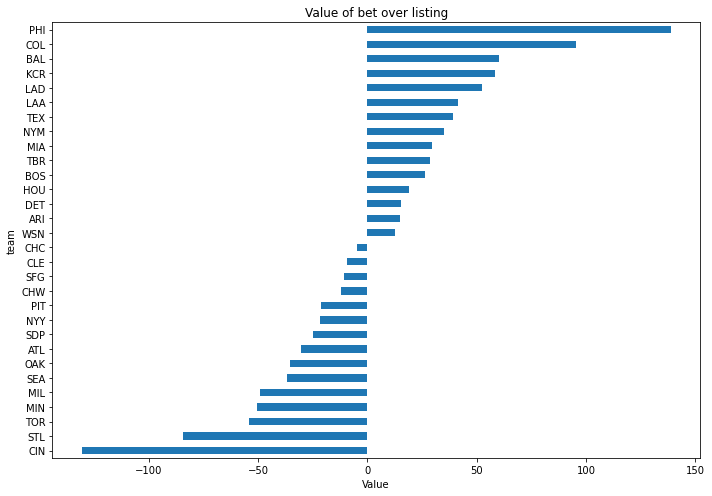

In [24]:
import matplotlib.pyplot as plt
compare_plot = pd.Series(compare['comparison'].values, index = compare['team']).sort_values()
fig, ax = plt.subplots(figsize = (10,7))
compare_plot.plot.barh(ax=ax)
ax.set_title("Value of bet over listing")
ax.set_xlabel("Value")
fig.tight_layout()
plt.savefig('../images/comparison_values_aug_16th.png');